<a href="https://colab.research.google.com/github/geeksid1800/ICG_ass1_logisticRegression/blob/main/ICG_assignment1_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#print(train_data["Age"].isnull().sum())

#mod_train_data = train_data.dropna(subset=['Age'])
mod_train_data = train_data
tr_med = mod_train_data['Age'].median(skipna=True);
#print("median ",tr_med)
mod_train_data.fillna(tr_med,inplace=True)
mod_train_data['Sex'].replace(['male','female'],[1,2],inplace=True)

mod_test_data = test_data
ts_med = mod_test_data['Age'].median(skipna=True);
#print("median ",ts_med)
mod_test_data.fillna(ts_med,inplace=True)
mod_test_data['Sex'].replace(['male','female'],[1,2],inplace=True)

mod_train_data.to_csv('mod_train_data.csv',index=False)
mod_test_data.to_csv('mod_test_data.csv',index=False)



In [2]:
#plotting helper functions

def plot_points(X, y):
    survived = X[np.argwhere(y==1)]
    dead = X[np.argwhere(y==0)]
    plt.scatter([s[0][3] for s in dead], [s[0][6] for s in dead], s = 25, color = 'blue', edgecolor = 'g')
    plt.scatter([s[0][3] for s in survived], [s[0][6] for s in survived], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [3]:
tr_data = pd.read_csv(r'mod_train_data.csv')
X_train = np.array(tr_data.iloc[:, np.r_[0,2:8]])
y_train = np.array(tr_data.iloc[:,1])

ts_data = pd.read_csv(r'mod_test_data.csv')
X_test = np.array(ts_data.iloc[:, np.r_[0,2:8]])
y_test = np.array(ts_data.iloc[:,1])

#plot_points(X,y)
#plt.show()
#print(X[:10])
#print(y[:10])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[ 0.28516837]
 [ 0.224062  ]
 [-1.95635561]
 [ 2.72936037]
 [-1.14278083]
 [-1.23336648]
 [-0.37713197]
 [-0.15164327]
 [ 0.18118868]
 [-0.11624461]
 [ 0.10691728]
 [-0.11624461]
 [-0.70608571]
 [-0.07858936]
 [ 0.10691728]
 [-0.07858936]
 [-0.13315052]] 



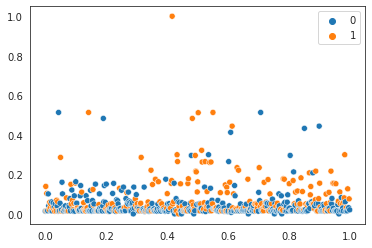

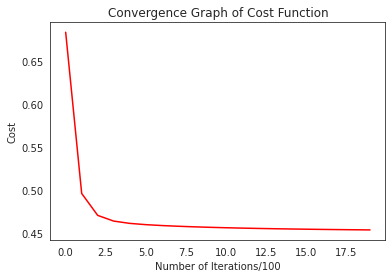

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The score is  0.7970479704797048
final cost  [[0.45345292]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


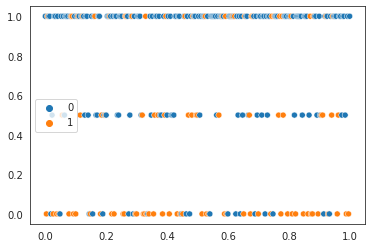

In [11]:
import seaborn as sns

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    s = int(iterations/100)
    cost_history = np.zeros((s,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y))
        if not i%100:
          plt_itr = int(i/100)
          cost_history[plt_itr] = compute_cost(X, y, params)

    return (cost_history, params)

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

def predict(X, params):
    return np.round(sigmoid(X @ params))

list_imp = [1,4,7];
m = len(y_train)    #no. of training examples

X = np.hstack((np.ones((m,1)),X_train))  #add a column for the bias vector input, ie feature x0
X_addn = np.array([])
for i in list_imp:
  for j in list_imp:
    temp = np.multiply(X[:,i], X[:,j])
    temp = temp[:,np.newaxis]
    if X_addn.size==0:
      X_addn = temp;
    else:
      X_addn = np.hstack((X_addn,temp))
X = np.hstack((X,X_addn))

list_composite = np.r_[list_imp,8,9,10,11,12,13,14,15,16]

for col in range(1,17):
  mini = X[:,col].min()
  maxi = X[:,col].max()
  if mini != maxi:
    X[:,col] = (X[:,col] - mini)/ (maxi - mini)
y = y_train[:,np.newaxis]
n = np.size(X,1)  #no. of given features+1. ie no. of columns+1
params = np.zeros((n,1))

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,7],hue=y.reshape(-1));  #scatter plot of (ID, fare) for survival/death


iterations = 2000
learning_rate = 0.2

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")
#print(cost_history[-10:])
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations/100")
plt.ylabel("Cost")
plt.show()


m1 = len(y_test)

X = np.hstack((np.ones((m1,1)),X_test))
X_addn = np.array([])
for i in list_imp:
  for j in list_imp:
    temp = np.multiply(X[:,i], X[:,j])
    temp = temp[:,np.newaxis]
    if X_addn.size==0:
      X_addn = temp;
    else:
      X_addn = np.hstack((X_addn,temp))
X = np.hstack((X,X_addn))
for col in range(1,17):
  mini = X[:,col].min()
  maxi = X[:,col].max()
  if mini != maxi:
    X[:,col] = (X[:,col] - mini)/ (maxi - mini)

y = y_test[:,np.newaxis]
n1 = np.size(X,1)

y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print("The score is ",score)
print("final cost ", cost_history[-1:])

slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

